In [2]:
# Imports and defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ast import literal_eval

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 9
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

import platform
print("python %s" % platform.python_version())
print("matplotlib %s" % mpl.__version__)

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

python 3.6.8
matplotlib 3.2.2


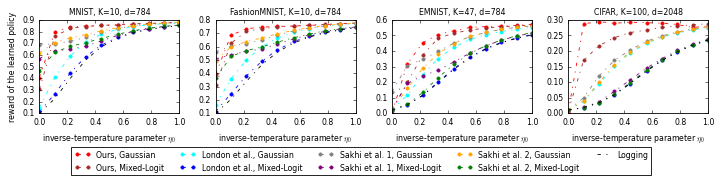

In [3]:
# resize to 80% in the paper
mpl.rcParams["font.size"] = 7
#plt.figure(figsize=(6.8, 1.75))

vision_datasets = ['MNIST', 'FashionMNIST', 'EMNIST', 'CIFAR']
methods = ['ours, gaussian', 'ours, mixed-logit','london, gaussian', 'london, mixed-logit', 'sakhi1, gaussian', 'sakhi1, mixed-logit', 'sakhi2, gaussian', 'sakhi2, mixed-logit', 'logging_reward']
colors_ = {'ours, gaussian':'red', 'ours, mixed-logit':'brown','london, gaussian':'cyan', 'london, mixed-logit':'blue', 'sakhi1, gaussian':'gray', 'sakhi1, mixed-logit':'purple', 'sakhi2, gaussian':'orange', 'sakhi2, mixed-logit':'green', 'logging_reward':'k'}
model_names_ = [r'Ours, Gaussian', r'Ours, Mixed-Logit','London et al., Gaussian', 'London et al., Mixed-Logit', 'Sakhi et al. 1, Gaussian', 'Sakhi et al. 1, Mixed-Logit', 'Sakhi et al. 2, Gaussian', 'Sakhi et al. 2, Mixed-Logit', 'Logging']
line_styles = {'ours, alpha=0.9':'-.', 'london et al.':'-.', 'sakhi et al. 1':'-.', 'sakhi et al. 2':'-.', 'logging_risk':'--'}
line_styles = {'ours, gaussian':'-.', 'ours, mixed-logit':'-.','london, gaussian':'-.', 'london, mixed-logit':'-.', 'sakhi1, gaussian':'-.', 'sakhi1, mixed-logit':'-.', 'sakhi2, gaussian':'-.', 'sakhi2, mixed-logit':'-.', 'logging_reward':'-.'}

markers = {'ours, gaussian':'.', 'ours, mixed-logit':'.','london, gaussian':'.', 'london, mixed-logit':'.', 'sakhi1, gaussian':'.', 'sakhi1, mixed-logit':'.', 'sakhi2, gaussian':'.', 'sakhi2, mixed-logit':'.', 'logging_reward':''}
fig, axs = plt.subplots(1, 4, sharex='col', figsize=(2.26 * 4, 2.2 * 1),constrained_layout=False)#sharey=Truesharey='row', 

for i in range(4):
    ax = axs[i]
    data_name = vision_datasets[i]
    df = pd.read_csv('results/results_' + data_name + '.csv')
    
    for k, name in enumerate(methods):
        ax.plot(df['eta'], df[name], linestyle=line_styles[name], marker=markers[name], color=colors_[name], label=model_names_[k])
        if i<2:
            ax.set_title(data_name + ', K=10, d=784')
        elif i==2:
            ax.set_title(data_name + ', K=47, d=784')
        else:
            ax.set_title(data_name + ', K=100, d=2048')
        
    if i==0:
        ax.set_ylabel(r'reward of the learned policy')
    #if i==1:
    ax.set_xlabel(r'inverse-temperature parameter $\eta_0$')
        
fig.tight_layout()
fig.subplots_adjust(bottom=0.35)
fig.legend(labels=model_names_, loc="lower center", ncol=5)

fig.savefig("figures/vision_datasets.pdf", format="pdf", dpi=1200, bbox_inches=0)
fig.show()